In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
# ----------------------------
# 1. Synthetic Dataset Creation
# ----------------------------
np.random.seed(42)
X = 2 * np.random.rand(100, 3) # 3 features
true_coefs = np.array([5, -3, 2])
y = X @ true_coefs + np.random.randn(100) * 0.5 # add noise

In [3]:
# ----------------------------
# 2. Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# ----------------------------
# 3. Feature Scaling (important for Ridge)
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# ----------------------------
# 4. Manual Ridge Regression (Closed Form Solution)
# ----------------------------
alpha = 10
n_features = X_train_scaled.shape[1]
I = np.identity(n_features)

In [6]:
# Ridge solution: (X^T X + alpha*I)^-1 X^T y
ridge_coef_manual = np.linalg.inv(
X_train_scaled.T @ X_train_scaled + alpha * I
) @ (X_train_scaled.T @ y_train)


print("Manual Ridge Coefficients:", ridge_coef_manual)

Manual Ridge Coefficients: [ 2.50910529 -1.66849881  1.09310903]


In [7]:
# ----------------------------
# 5. Using sklearn Ridge Regression
# ----------------------------
ridge = Ridge(alpha=10, solver="auto")
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)


print("Sklearn Ridge Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

Sklearn Ridge Coefficients: [ 2.50910529 -1.66849881  1.09310903]
Intercept: 3.721620495447381


In [8]:
# ----------------------------
# 6. Model Evaluation
# ----------------------------
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


# Cross-validation
cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean CV R2:", np.mean(cv_scores))

R2 Score: 0.9402539438008539
RMSE: 0.8535295609264186
MAE: 0.6956783666165943
Cross-Validation R2 Scores: [0.9658184  0.95724204 0.95097097 0.96131083 0.96320615]
Mean CV R2: 0.9597096774600301


In [9]:
# ----------------------------
# 7. Compare Ridge vs Linear Regression
# ----------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)


print("Linear Regression Coefficients:", lin_reg.coef_)

Linear Regression Coefficients: [ 2.84820761 -1.87933165  1.25514259]


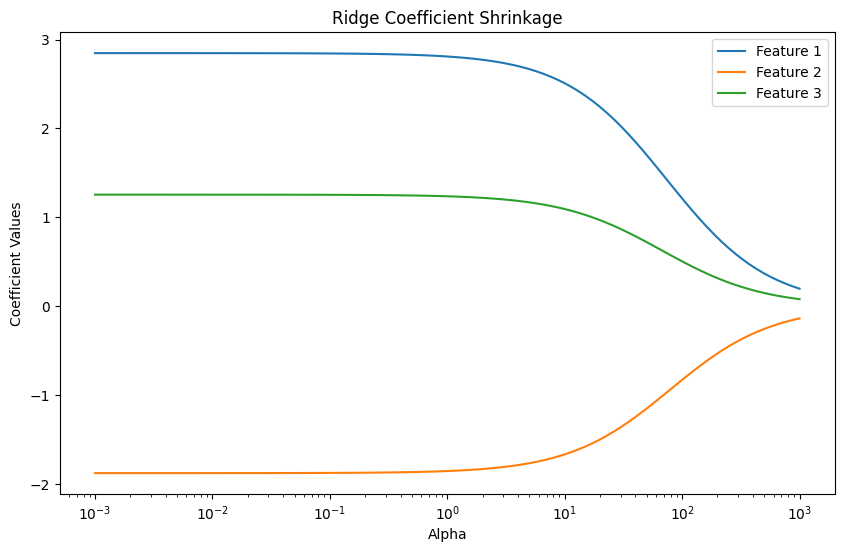

In [11]:
# ----------------------------
# 8. Visualize Coefficient Shrinkage
# ----------------------------
alphas = np.logspace(-3, 3, 100)
coefs = []


for a in alphas:
   ridge = Ridge(alpha=a)
   ridge.fit(X_train_scaled, y_train)
   coefs.append(ridge.coef_)


coefs = np.array(coefs)


plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Values')
plt.title('Ridge Coefficient Shrinkage')
plt.legend(["Feature 1", "Feature 2", "Feature 3"])
plt.show()

In [12]:
# ----------------------------
# 9. Predict on New Data
# ----------------------------
new_data = np.array([[1.5, 2.0, -1.0]])
new_data_scaled = scaler.transform(new_data)
print("Prediction on new data:", ridge.predict(new_data_scaled))

Prediction on new data: [3.43019393]
